<a href="https://colab.research.google.com/github/eftekhar-hossain/Teaching/blob/main/Lab_06_(Deep_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETE-456 Machine Learning Sessional

Lab-06: **Introduction to Deep Neural Network (DNN)**

> Objective: 
 1. *Classification problems using Deep Neural Network.*
 2. Develop DNN models using Tensorflow Framework



In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##Dataset

In [ ]:
# Download the data
!wget -O Social_Network_Ads.csv https://www.dropbox.com/s/o8v5zpw972uwlxy/Social_Network_Ads.csv?dl=0

Based on Age and Estimated Salary can a person able to purchase a car?🚗

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
feature = dataset[['Age','EstimatedSalary']]  # for independent
target = dataset[['Purchased']]   # for dependent

In [ ]:
feature

In [ ]:
target

##Splitting the Dataset

In [ ]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
print(X_train.shape)
print(X_test.shape)

(320, 2)
(80, 2)


In [ ]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
14,18,82000
363,42,79000
304,40,60000
361,53,34000


#Feature Scaling

In [ ]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test) 

#Neural Network

**Building a Multilayer Neural Network with Tensorflow Keras**. 


Before training our model, we have to build it. Building the architecture of a neural network in Keras is done using the **Sequential class**. Layers can be added to whatever numbers you desire. 

First off, we will create a single hidden layer and see how the model performs. 

Since the data we are passing into the model has 1 features, we must define the input_dim parameter in the first layer and set it to 1. Our single hidden is set to have 15 nodes and then it’s passed to the output layer with just one node. Since it is a linear regression problem and the output is just one number, the final layer should have one node. 

In addition, the hidden layer has a ReLu activation function whereas the output function has a linear activation function. If you don’t know what activation functions are, I like to see them as ‘switches’ that are responsible for aggregating the weights of the nodes to give an output to the next node input. 

The code to build the neural network architecture is shown below. 

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#built the neural network architecture
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                60        
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


The next step is to compile the model. We use an `Adam` optimizer with a **binary_crossentropy**. We defined the validation metrics to be **accuracy**.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##Training the Model

The model was trained on 200 epochs with a validation set of 20% of the train data. The validation set helps you check how well the model is learning during the training process, based on the loss function.

In [ ]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 0.5919 - accuracy: 0.7847 - val_loss: 0.5700 - val_accuracy: 0.8438
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5751 - accuracy: 0.8056 - val_loss: 0.5481 - val_accuracy: 0.8438
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.8229 - val_loss: 0.5279 - val_accuracy: 0.9062
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.8264 - val_loss: 0.5099 - val_accuracy: 0.9062
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5318 - accuracy: 0.8299 - val_loss: 0.4930 - val_accuracy: 0.9062
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.8299 - val_loss: 0.4774 - val_accuracy: 0.9062
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.8299 - val_loss: 0.4626 - val_accuracy: 0.9062
Epoch 8/100
9/9 [=========

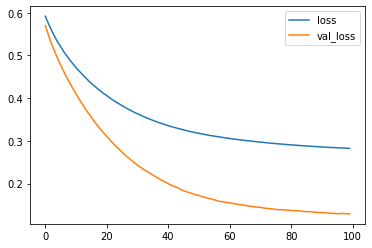

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

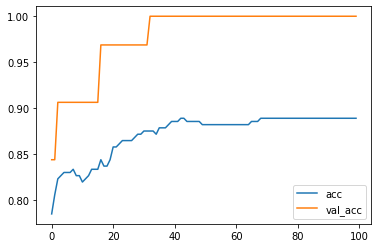

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [ ]:
#Prediction
y_pred = model.predict(X_test)


In [ ]:
y_test

,Purchased
132,0
309,0
341,0
196,0
246,0
...,...
14,0
363,0
304,0
361,1


In [ ]:
y_pred

In [ ]:
y_pred = y_pred > 0.5
y_pred

In [ ]:
pred = y_pred.astype('uint8')
pred

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



#Reference


1.   [SuperDataScience](https://www.superdatascience.com/pages/machine-learning)

